# AI Bauchi 6 Weeks Computer Vision Bootcamp

<div style="display: flex; justify-content: space-evenly; align-items: center; width: 100%;">
<img src="../../logos\aib.png" width='100px'/>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQeyMRtudTwUIhRHGT1VKvVbnRYTu8VaQtaHg&s" width='100px'/>
<img src="https://miro.medium.com/v2/resize:fit:800/0*qa3Uh-1JZUhCuBVK.png" width='100px'/>
</div>

---

## Session 5: Advanced Image Processing

In this session, we will delve into advanced image processing techniques that are essential for enhancing image features and extracting valuable information. These techniques are widely used in various computer vision applications such as object detection, image segmentation, and more.

### Topics Covered:

1. **Morphological Transformations**
    - Erosion
    - Dilation
    - Opening
    - Closing

2. **Contour Detection and Analysis**
    - Finding contours
    - Drawing contours
    - Contour properties (area, perimeter, centroid, bounding box)

3. **Image Thresholding**
    - Simple thresholding
    - Adaptive thresholding
    - Otsu's binarization

---


### 1. Morphological Transformations

Morphological transformations are a set of operations that process images based on shapes. These operations apply a structuring element to an input image and generate an output image.

#### Erosion
Erosion reduces the boundaries of the foreground object. It is useful for removing small white noises and isolating individual elements. you can apply erosion using the `cv2.erode()` function.


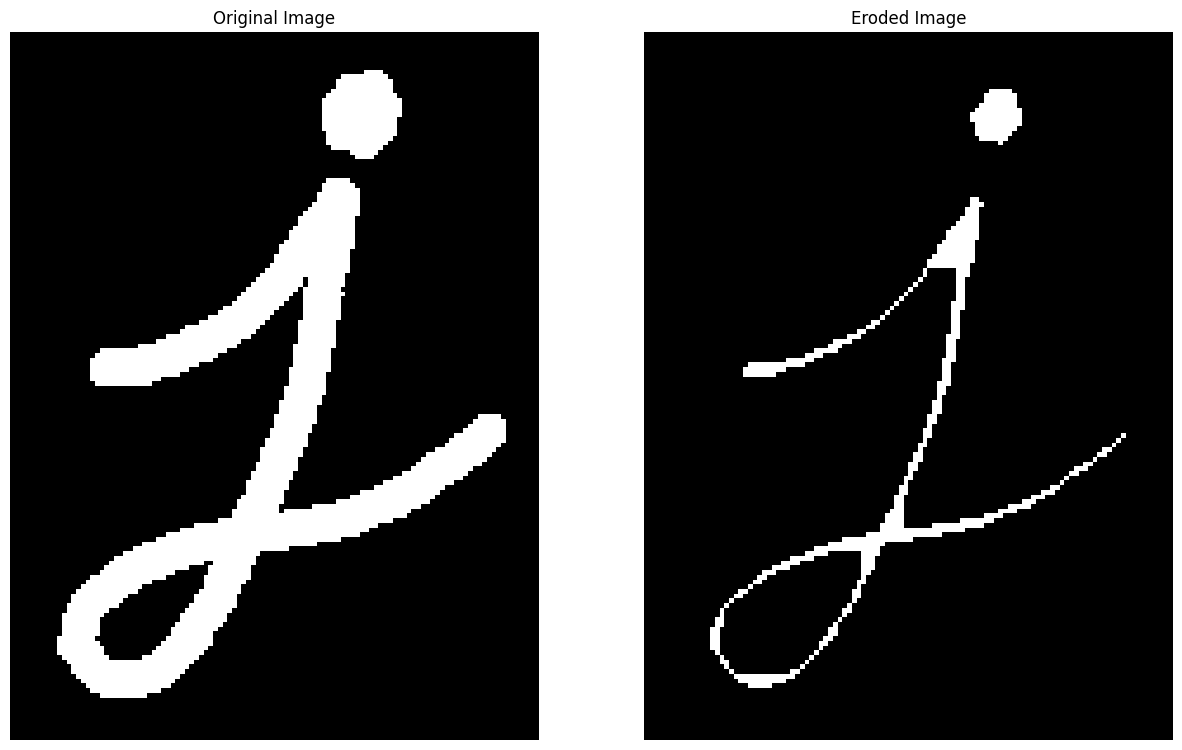

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('image/image.png')


# Create a structuring element
kernel = np.ones((6,6), np.uint8)

# Apply erosion
erosion = cv2.erode(image, kernel, iterations = 1)

# Display the result
plt.figure(figsize=(15, 10))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.axis('off')
plt.subplot(122), plt.imshow(erosion, cmap='gray'), plt.title('Eroded Image')
plt.axis('off')
plt.show()

#### Dilation
Dilation increases the object area and is useful for connecting broken parts of an object. the `cv2.dilate()` function is used to apply dilation.

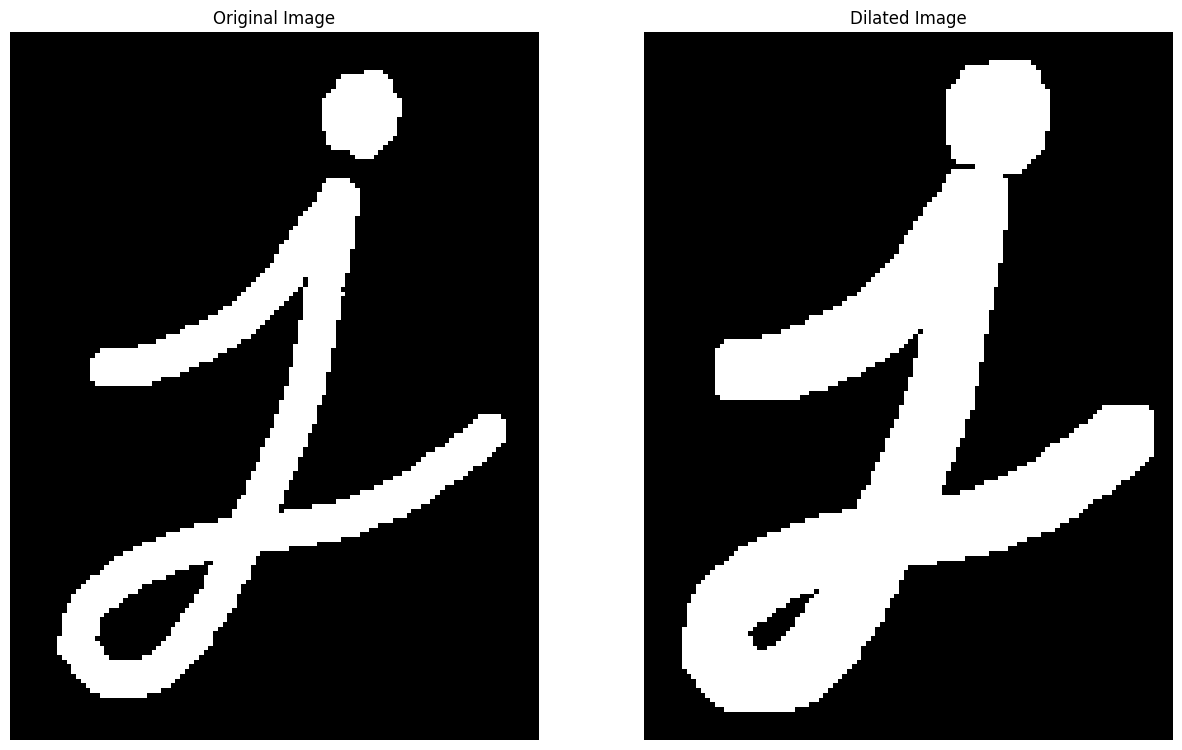

In [18]:
# Apply dilation
dilation = cv2.dilate(image, kernel, iterations = 1)

# Display the result
plt.figure(figsize=(15, 10))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(dilation, cmap='gray'), plt.title('Dilated Image'), plt.axis('off')
plt.show()


#### Opening
Opening is a combination of erosion followed by dilation. It is useful for removing noise. The `cv2.morphologyEx()` function is used to apply opening. and the `cv2.MORPH_OPEN` flag is used to specify opening.


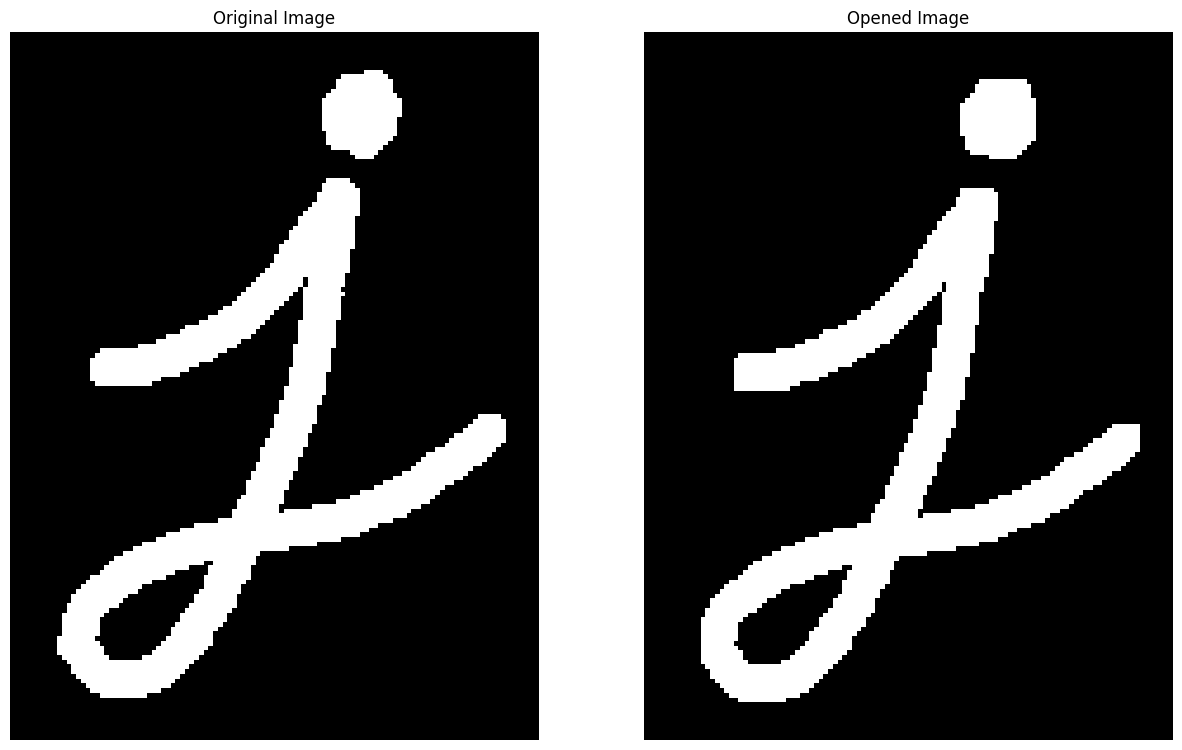

In [21]:
# Apply opening
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Display the result
plt.figure(figsize=(15, 10))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(opening, cmap='gray'), plt.title('Opened Image'), plt.axis('off')
plt.show()

#### Closing
Closing is a combination of dilation followed by erosion. It is useful for closing small holes inside the foreground objects. The `cv2.morphologyEx()` function is used to apply closing. and the `cv2.MORPH_CLOSE` flag is used to specify closing.

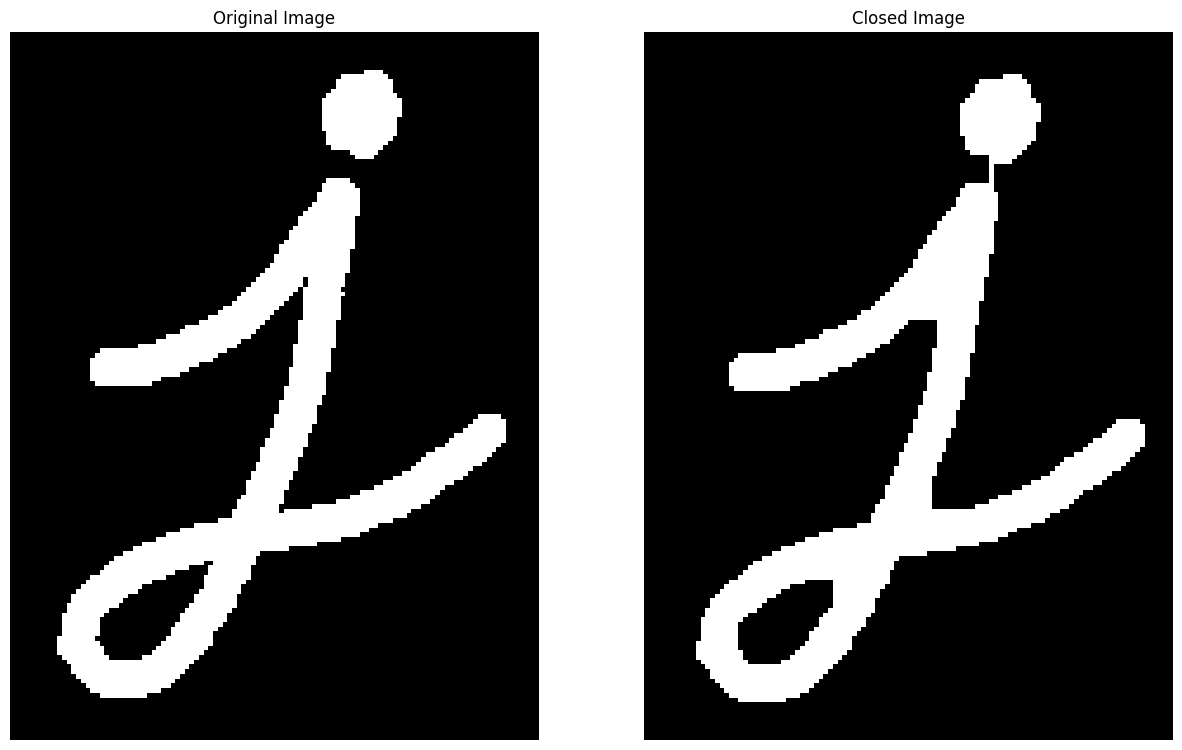

In [23]:
# Apply closing
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Display the result
plt.figure(figsize=(15, 10))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(closing, cmap='gray'), plt.title('Closed Image'), plt.axis('off')
plt.show()

### 2. Contour Detection and Analysis

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having the same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

to find contours in an image, you can use the `cv2.findContours()` function. This function returns a list of contours and a hierarchy. The contours are a Python list of all the contours in the image. Each individual contour is a Numpy array of (x, y) coordinates of boundary points of the object.

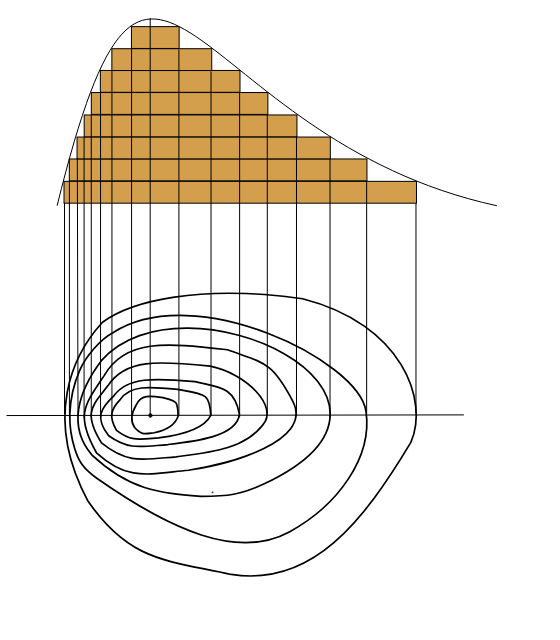

28


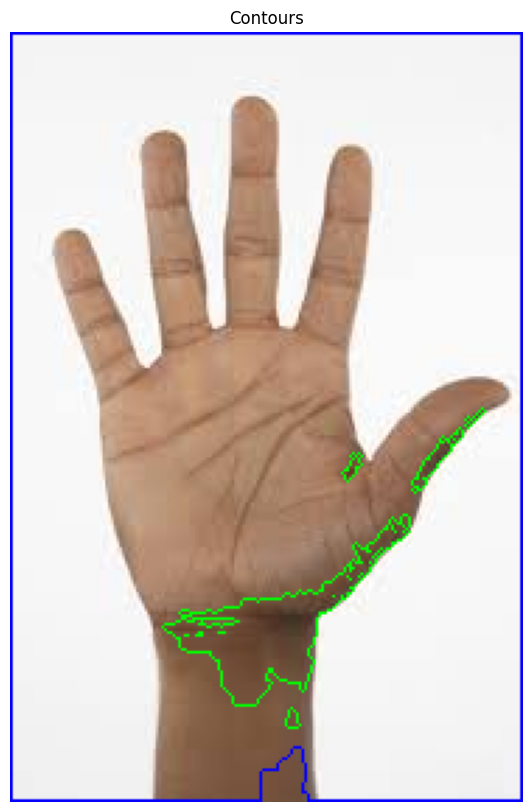

In [63]:
# open the image
image = cv2.imread('image/hand.jpeg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
ret, thresh = cv2.threshold(gray, 90, 255, 0)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert the image to RGB space

print(len(contours))
# Draw contours with different colors based on hierarchy
contour_image = image.copy()
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        color = (5, 0, 250)  # Blue color for contours with no parent
    else:
        color = (0, 255, 0)  # Green color for contours with parent
    contour_image = cv2.drawContours(contour_image, contours, i, color, 1)

# Display the result
plt.figure(figsize=(15, 10))
plt.imshow(contour_image)
plt.title('Contours')
plt.axis('off')
plt.show()

### 3. Image Thresholding

Image thresholding is a simple yet effective technique for segmenting images. It is used to create binary images from grayscale images. The thresholding operation compares each pixel of an image with a predefined threshold value. If the pixel value is greater than the threshold, it is assigned one value (usually white), and if it is less than the threshold, it is assigned another value (usually black).

#### Simple Thresholding

Simple thresholding is the most basic form of thresholding. It is used to create a binary image from a grayscale image. The `cv2.threshold()` function is used to apply simple thresholding.

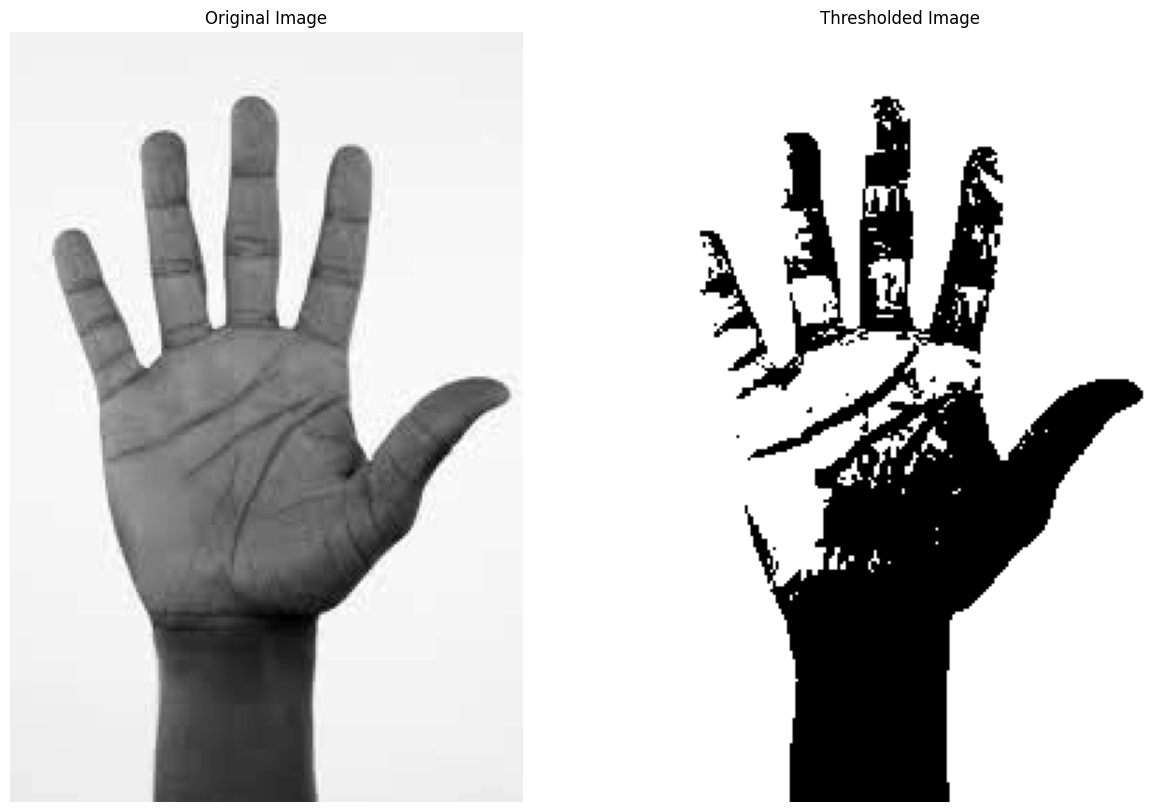

In [66]:
# Apply simple thresholding
ret, thresh = cv2.threshold(gray, 147, 255, cv2.THRESH_BINARY)

# Display the result
plt.figure(figsize=(15, 10))
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(thresh, cmap='gray'), plt.title('Thresholded Image'), plt.axis('off')
plt.show()


#### Adaptive Thresholding

Adaptive thresholding is used when the image has different lighting conditions in different areas. It calculates the threshold for a small region of the image. The `cv2.adaptiveThreshold()` function is used to apply adaptive thresholding.

The parameters for cv2.adaptiveThreshold are:
- gray : The input image
- maxValue : The maximum intensity value that can be assigned to a pixel (usually 255)
- adaptiveMethod : The method used to calculate the threshold value (Chooses between cv2.ADAPTIVE_THRESH_MEAN_C or cv2.ADAPTIVE_THRESH_GAUSSIAN_C.)
- thresholdType : The type of thresholding operation
- blockSize : The size of the neighborhood area used to calculate the threshold value
- C : A constant value subtracted from the calculated threshold value

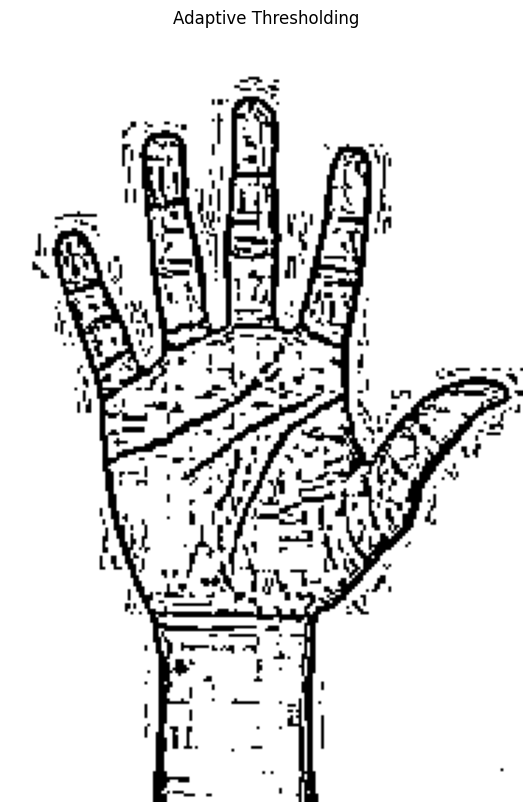

In [67]:
# Apply adaptive thresholding
thresh2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 2)

# Display the result
plt.figure(figsize=(15, 10))
plt.imshow(thresh2, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')
plt.show()

#### Otsu's Binarization

Otsu's 

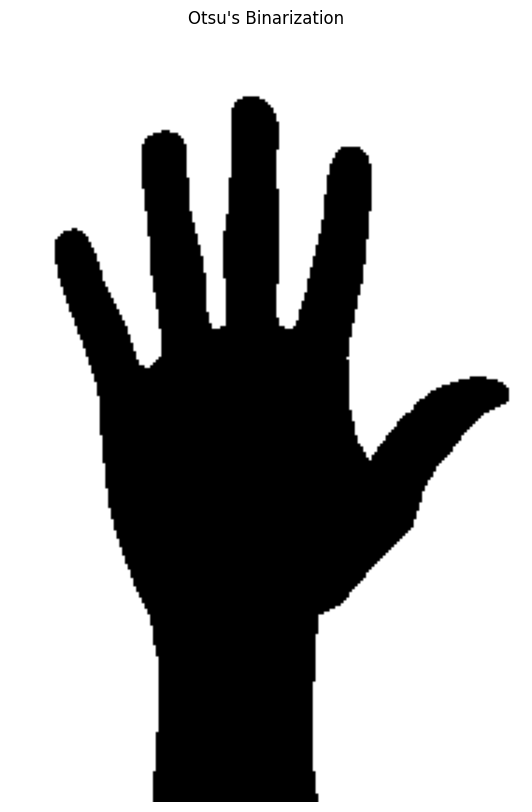

In [60]:
# Apply Otsu's binarization
ret2, thresh3 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the result
plt.figure(figsize=(15,10))
plt.imshow(thresh3, cmap='gray')
plt.title('Otsu\'s Binarization')
plt.axis('off')
plt.show()

---

### Conclusion

In this session, we have covered various advanced image processing techniques. These techniques are essential for enhancing and extracting valuable information from images, which is crucial for many computer vision applications. Practice using these techniques and try to implement them in your projects.